In [1]:
#import the required pacakge
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler

# importing ploting libraries
import matplotlib.pyplot as plt   


In [2]:
#to enable the plotting on Jupyter notebook
%matplotlib inline

In [3]:

## load data
prod_df = pd.read_csv('cproducts.csv')
tend_df = pd.read_csv('ctender.csv')



In [4]:
#check the shape of the data
print('prodf has {} rows and {}   columns '.format(prod_df.shape[0],prod_df.shape[1]))
print('tend_df has {} rows and {} column '.format(tend_df.shape[0],tend_df.shape[1]))

prodf has 11972 rows and 16   columns 
tend_df has 149752 rows and 13 column 


In [5]:
#just check the data types of the prod_df and tend_df
print ('Product data structure')
print prod_df.dtypes
print('*********************************************')
print('tend data structure')
print tend_df.dtypes

Product data structure
customerID                     object
DOB                            object
Gender                         object
State                          object
PinCode                       float64
transactionDate                object
store_code                      int64
store_description              object
till_no                         int64
transaction_number_by_till      int64
promo_code                     object
promotion_description          object
product_code                    int64
product_description            object
sale_price_after_promo        float64
discountUsed                   object
dtype: object
*********************************************
tend data structure
customerID                     object
DOB                            object
Gender                         object
State                          object
PinCode                       float64
transactionDate                object
store_code                      int64
store_description      

In [6]:
#just will have glance of data 
prod_df.head(5)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,1975-10-20,male,MADHYA PRADESH,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,NONPROMO,NaN,1000446431,PATANJALI CHOCOS 125g,55.00,Payback
1,BBID_20485,1955-07-21,female,NaN,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,NONPROMO,NaN,1000010431,SOO FRESH ROLLS HOT DOG 4P,30.00,Payback
2,BBID_20498,1981-03-19,female,MAHARASHTRA,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,0000971754,AD 399 FLAT LADIES JEANS FASHION EXC,1000077851005,"DLJ-0010-BSF-2-CJ-FL, 34, BLACK",418.95,Payback
3,BBID_20499,1986-05-10,male,MAHARASHTRA,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,NONPROMO,NaN,1000443231,PATANJALI TOMATO KETCHUP BT 500g,70.00,Payback
4,BBID_204110,1988-02-29,male,MADHYA PRADESH,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,0000974126,NMP 5% OFF CONCEPT DISCOUNT 2655,300481741,MAGGI NDL MERI MASALA PP 70g,34.20,Payback


In [7]:
tend_df.head(5)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
0,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,GVOWN,9208,1000.00,GiftVoucher
1,BBID_2044,1984-04-02,male,NaN,626125.0,2015-09-03,4986,BB-MADURAI-KOCHADAI VILLAGE,22,CASH,9208,10.46,CASH
2,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,EDCAXIS,90269,677.28,AXIS
3,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90268,1042.00,One MobiKwik Systems
4,BBID_2044,1984-04-02,male,NaN,626125.0,2016-04-17,4986,BB-MADURAI-KOCHADAI VILLAGE,19,MOBI,90269,1000.00,One MobiKwik Systems


In [8]:
# check if any missing number in both the data

prod_df.isnull().sum()


customerID                       0
DOB                            319
Gender                        1028
State                         1583
PinCode                        817
transactionDate                  0
store_code                       0
store_description                0
till_no                          0
transaction_number_by_till       0
promo_code                       0
promotion_description         8510
product_code                     0
product_description              0
sale_price_after_promo           0
discountUsed                     0
dtype: int64

In [9]:
#check if any missing number in present in the tender data 
#check the NAN value in the train data set 
tend_df.isnull().sum()


customerID                        0
DOB                            4596
Gender                         6663
State                         11650
PinCode                        5564
transactionDate                   0
store_code                        0
store_description                 0
till_no                           0
tender_type                       0
transaction_number_by_till        0
payment_amount_by_tender          0
PaymentUsed                    1223
dtype: int64

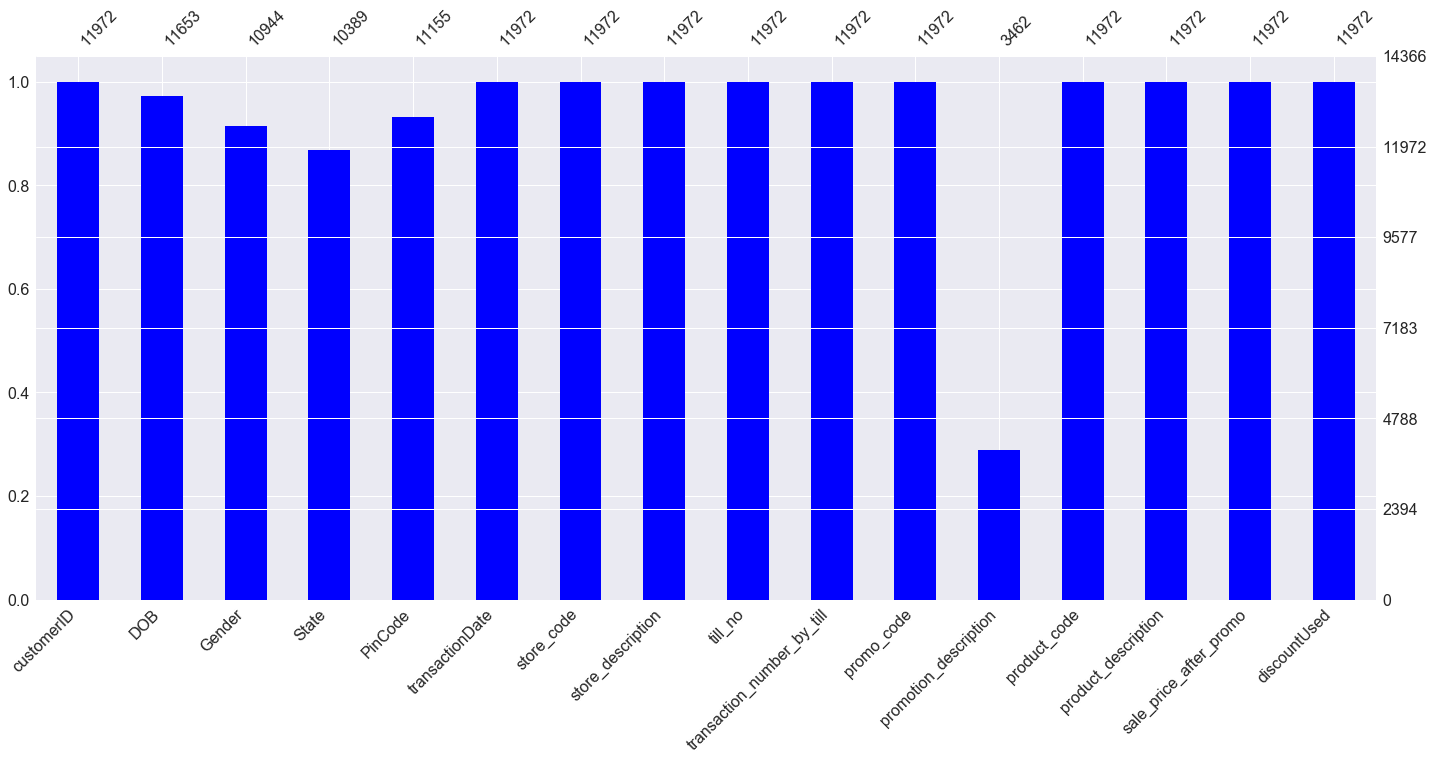

In [10]:
#visulaize the same using the missingno 
import missingno as msno
msno.bar(prod_df,color='blue')


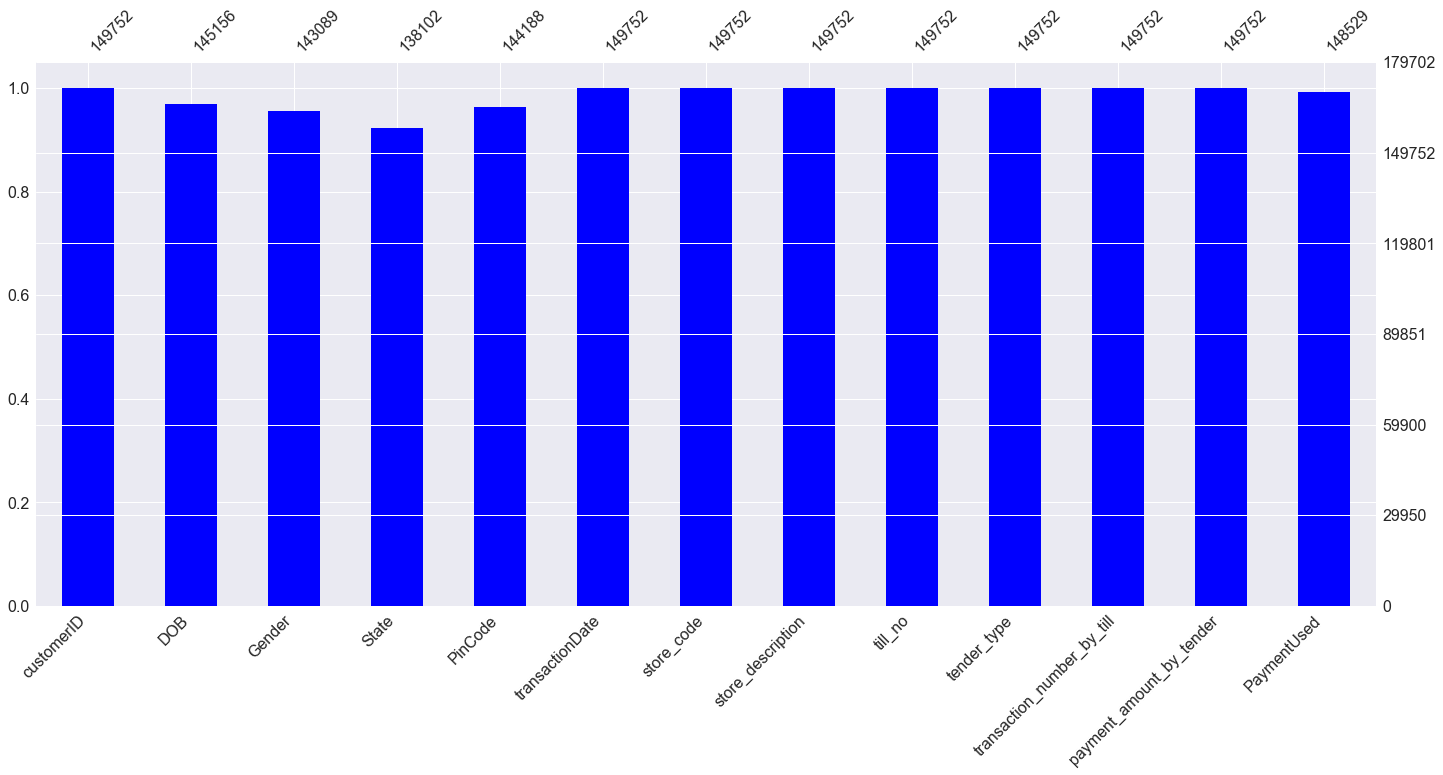

In [11]:
#visualize for tender 
msno.bar(tend_df,color='blue')

Observation from the above :
    #in product promotional description info is missing a lot hence may not contribute much in the model 
    #in both the data DOB,gender,State and pincode is missing but it is not less than 20 so will try to fill those value
    #both the data is having majority object type data type,may required to change for further processing 

In [12]:
# as product is having more number of missing number going to remove that column for further processing 
#prod_df=prod_df.drop('promotion_description',axis=1)


In [13]:
#get the summary of integer data type and object data type column 
prod_df.describe()

,PinCode,store_code,till_no,transaction_number_by_till,product_code,sale_price_after_promo
count,11155.000000,11972.000000,11972.000000,11972.000000,1.197200e+04,11972.000000
mean,550975.894666,3954.204895,9.491397,47701.304795,9.203021e+10,147.014886
std,214810.201978,1037.944359,5.771728,28745.657308,5.353262e+11,303.717711
min,14301.000000,2615.000000,1.000000,11.000000,1.001030e+08,-599.000000
25%,452001.000000,2655.000000,5.000000,22357.750000,1.080376e+08,30.000000
50%,580024.000000,4796.000000,9.000000,47437.500000,3.006113e+08,71.250000
75%,625018.000000,4843.000000,13.000000,71724.250000,1.000118e+09,156.000000
max,999999.000000,4986.000000,25.000000,99965.000000,5.001112e+13,8576.500000


In [14]:
#for object data type
prod_df.describe(include=[np.object])

,customerID,DOB,Gender,State,transactionDate,store_description,promo_code,promotion_description,product_description,discountUsed
count,11972,11653,10944,10389,11972,11972,11972,3462,11972,11972
unique,10410,7026,2,37,790,7,2214,2010,5997,28
top,BBID_211419317,NANA,male,MADHYA PRADESH,2017-04-02,BB-HUBLI-GOKUL ROAD-AKSHAY CEN,NONPROMO,AZ 10% OFF SUPER SAVING CARD ASSORTED,BB-CB-20X25X208SWG NEW,Payback
freq,7,154,7991,3064,66,2768,8510,300,96,6683


In [15]:
#check for tender also 
tend_df.describe()


,PinCode,store_code,till_no,transaction_number_by_till,payment_amount_by_tender
count,144188.000000,149752.000000,149752.000000,1.497520e+05,149752.000000
mean,548303.118158,4092.197707,9.699176,4.237656e+05,1515.504483
std,200022.478975,1015.442506,5.908312,5.135921e+07,2032.301453
min,14301.000000,2615.000000,1.000000,2.000000e+00,-28990.000000
25%,452001.000000,2655.000000,5.000000,2.365475e+04,299.000000
50%,580028.000000,4796.000000,9.000000,4.817500e+04,835.815000
75%,625016.000000,4843.000000,14.000000,7.249975e+04,2004.000000
max,999999.000000,4986.000000,25.000000,7.031894e+09,65635.400000


In [16]:
tend_df.describe(include=[np.object])

,customerID,DOB,Gender,State,transactionDate,store_description,tender_type,PaymentUsed
count,149752,145156,143089,138102,149752,149752,149752,148529
unique,9380,6561,2,37,792,7,45,33
top,BBID_20453330,1995-05-31,male,MADHYA PRADESH,2017-04-05,BB-HUBLI-GOKUL ROAD-AKSHAY CEN,CASH,CASH
freq,699,751,108394,36284,808,40588,56838,56838


observation from the data:
    #pin coe transaction code ,store code all are like unique code may not get much info from the summary
    #from summary we can see the top occurence customer ID and their respective details 
    #same for tender data 
    

In [17]:
###visulaztion to check the pattern ,spread and outlier of data 


In [18]:
#missing value fill 
prod_df['promotion_description'].fillna('no_promo', inplace=True)
prod_df['Gender'].fillna('no_gender', inplace=True)
prod_df['State'].fillna('no_state', inplace=True)
prod_df['PinCode'].fillna(-1, inplace=True)
prod_df['DOB'].fillna("1", inplace=True)

In [19]:


## convert data into numeric / float

for c in prod_df.columns:
    lbl = LabelEncoder()
    if prod_df[c].dtype == 'object' and c not in ['store_description','customerID','transactionDate']:
        prod_df[c] = lbl.fit_transform(prod_df[c])



In [20]:
prod_df.head(5)

,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
0,BBID_20482,3108,1,20,453441.0,2016-05-01,2655,BB-INDORE-MALHAR MEGA MALL,2,85246,2213,2010,1000446431,4269,55.00,24
1,BBID_20485,594,0,36,999999.0,2017-03-09,2655,BB-INDORE-MALHAR MEGA MALL,8,78829,2213,2010,1000010431,5121,30.00,24
2,BBID_20498,4175,0,21,400064.0,2015-08-12,2655,BB-INDORE-MALHAR MEGA MALL,13,1064,216,23,1000077851005,1617,418.95,24
3,BBID_20499,5224,1,21,400099.0,2016-12-18,2615,BB-AMRITSAR-TRILIUM MALL,14,51080,2213,2010,1000443231,4364,70.00,24
4,BBID_204110,5596,1,20,474001.0,2015-12-31,2655,BB-INDORE-MALHAR MEGA MALL,9,21911,225,1723,300481741,3472,34.20,24


In [21]:
stores = list(set(prod_df['store_code']))

In [22]:
stores

[4843, 3692, 2615, 2906, 4796, 4986, 2655]

In [23]:
cluster_labels = []
cluster_store = []
cluster_data = []
cluster_customers = []
cluster_score = []

In [24]:

for x in stores:
    cld = prod_df[prod_df['store_code'] == x]
    cluster_customers.append(cld['customerID'])
    cld.drop(['store_code','customerID','transactionDate','store_description'], axis=1, inplace=True)
    
    rbs = RobustScaler()
    cld2 = rbs.fit_transform(cld)
    
    km1 = KMeans(n_clusters=3)
    km2 = km1.fit(cld2)
    label = km2.predict(cld2)
    
    s_score = silhouette_score(cld2, label)
    cluster_score.append(s_score)
    
    cluster_labels.append(label)
    cluster_store.append(np.repeat(x, cld.shape[0]))
    cluster_data.append(cld2)

C:\Users\Ravi\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
np.mean(cluster_score)

0.92850344428426801

In [26]:
## merge list into ndarray
cluster_data = np.concatenate(cluster_data)

In [27]:
## check if the array has same rows as products file - Yes!
cluster_data.shape

(11972L, 12L)

In [28]:
## convert nested lists as 1d array
cluster_customers = np.concatenate(cluster_customers)
cluster_store = np.concatenate(cluster_store)
cluster_labels = np.concatenate(cluster_labels)

In [29]:


## create submission files
sub1 = pd.DataFrame({'customerID':cluster_customers, 'store_code':cluster_store, 'cluster':cluster_labels})



In [30]:
np.savetxt('result/subOne_18.txt', cluster_data)
sub1.to_csv('result/subtwo_18.csv', index=False)

In [33]:
#check the spread of the data 
# using sea born library check the spread of data and relation between them 
#importing seaborn for statistical plots
import seaborn as sns


In [35]:
#heat map for correlation 
#calculate the correlation matrix
corr = prod_df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)


#draw the correlation table 
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,DOB,Gender,State,PinCode,store_code,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
DOB,1,-0.11,0.045,0.015,-0.16,-0.035,-0.027,0.013,0.0081,0.022,-0.021,0.019,0.11
Gender,-0.11,1,0.044,-0.25,0.051,-0.0024,-0.015,-0.037,-0.027,-0.01,0.012,0.018,-0.17
State,0.045,0.044,1,-0.15,-0.072,0.022,-0.033,-0.0051,0.017,-0.00089,-0.028,-0.0019,-0.06
PinCode,0.015,-0.25,-0.15,1,0.42,0.15,0.052,-0.0045,0.042,-0.013,-0.0018,-0.024,0.41
store_code,-0.16,0.051,-0.072,0.42,1,0.3,0.12,-0.067,-0.023,-0.013,-0.0033,0.0069,0.32
till_no,-0.035,-0.0024,0.022,0.15,0.3,1,0.0085,-0.015,0.03,-0.009,-0.0019,-0.0077,0.12
transaction_number_by_till,-0.027,-0.015,-0.033,0.052,0.12,0.0085,1,0.013,-0.019,-0.0044,0.0028,0.008,0.02
promo_code,0.013,-0.037,-0.0051,-0.0045,-0.067,-0.015,0.013,1,0.65,-0.067,-0.026,-0.1,0.016
promotion_description,0.0081,-0.027,0.017,0.042,-0.023,0.03,-0.019,0.65,1,-0.14,-0.021,-0.15,0.13
product_code,0.022,-0.01,-0.00089,-0.013,-0.013,-0.009,-0.0044,-0.067,-0.14,1,0.022,0.19,0.011


looks like no correlation here :( 